In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.style.use('ggplot')

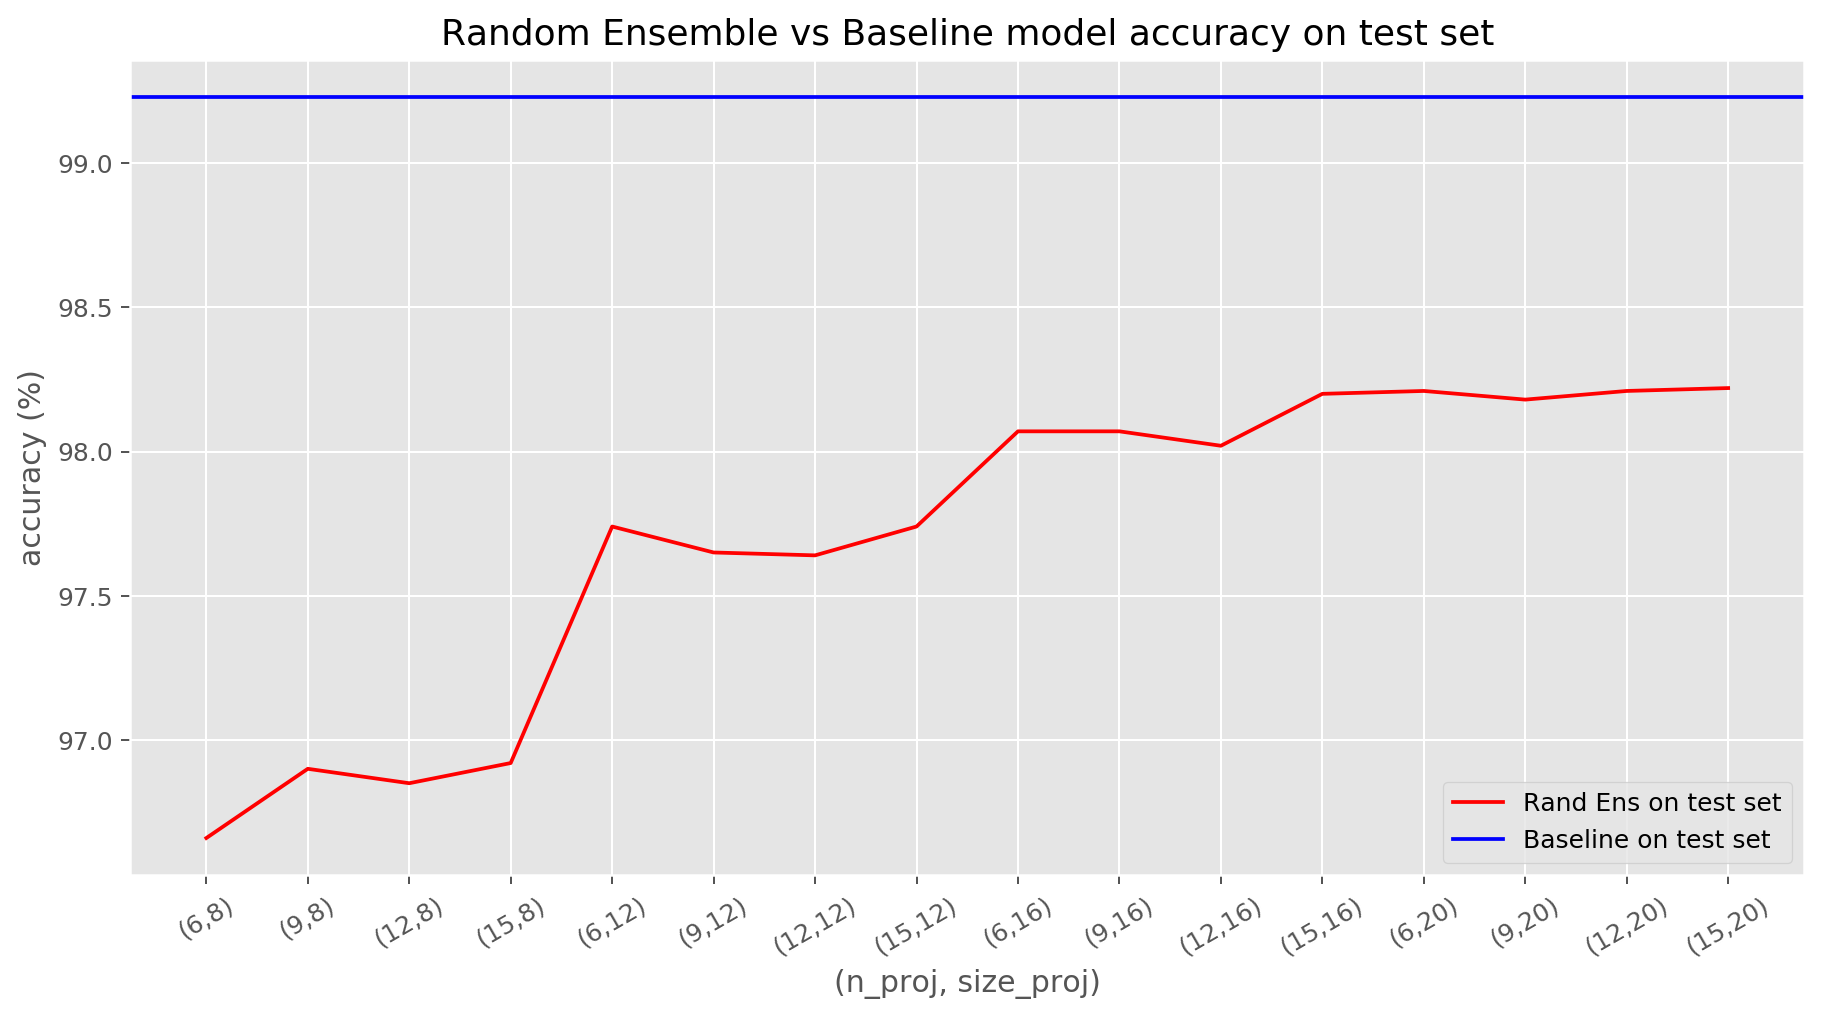

In [135]:
# random ensemble accuracy vs evaluation set
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)
baseline_test = 99.23
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
figure(figsize=(12, 6), dpi=180, facecolor='w', edgecolor='k')

plt.plot(x,random_test,color='red',label='Rand Ens on test set')
plt.axhline(y=baseline_test,color='blue',label='Baseline on test set')
plt.xlabel('(n_proj, size_proj)')
plt.ylabel('accuracy (%)')
plt.xticks(x, xlab, rotation=30) 
plt.legend()

plt.title("Random Ensemble vs Baseline model accuracy on test set")
plt.show()

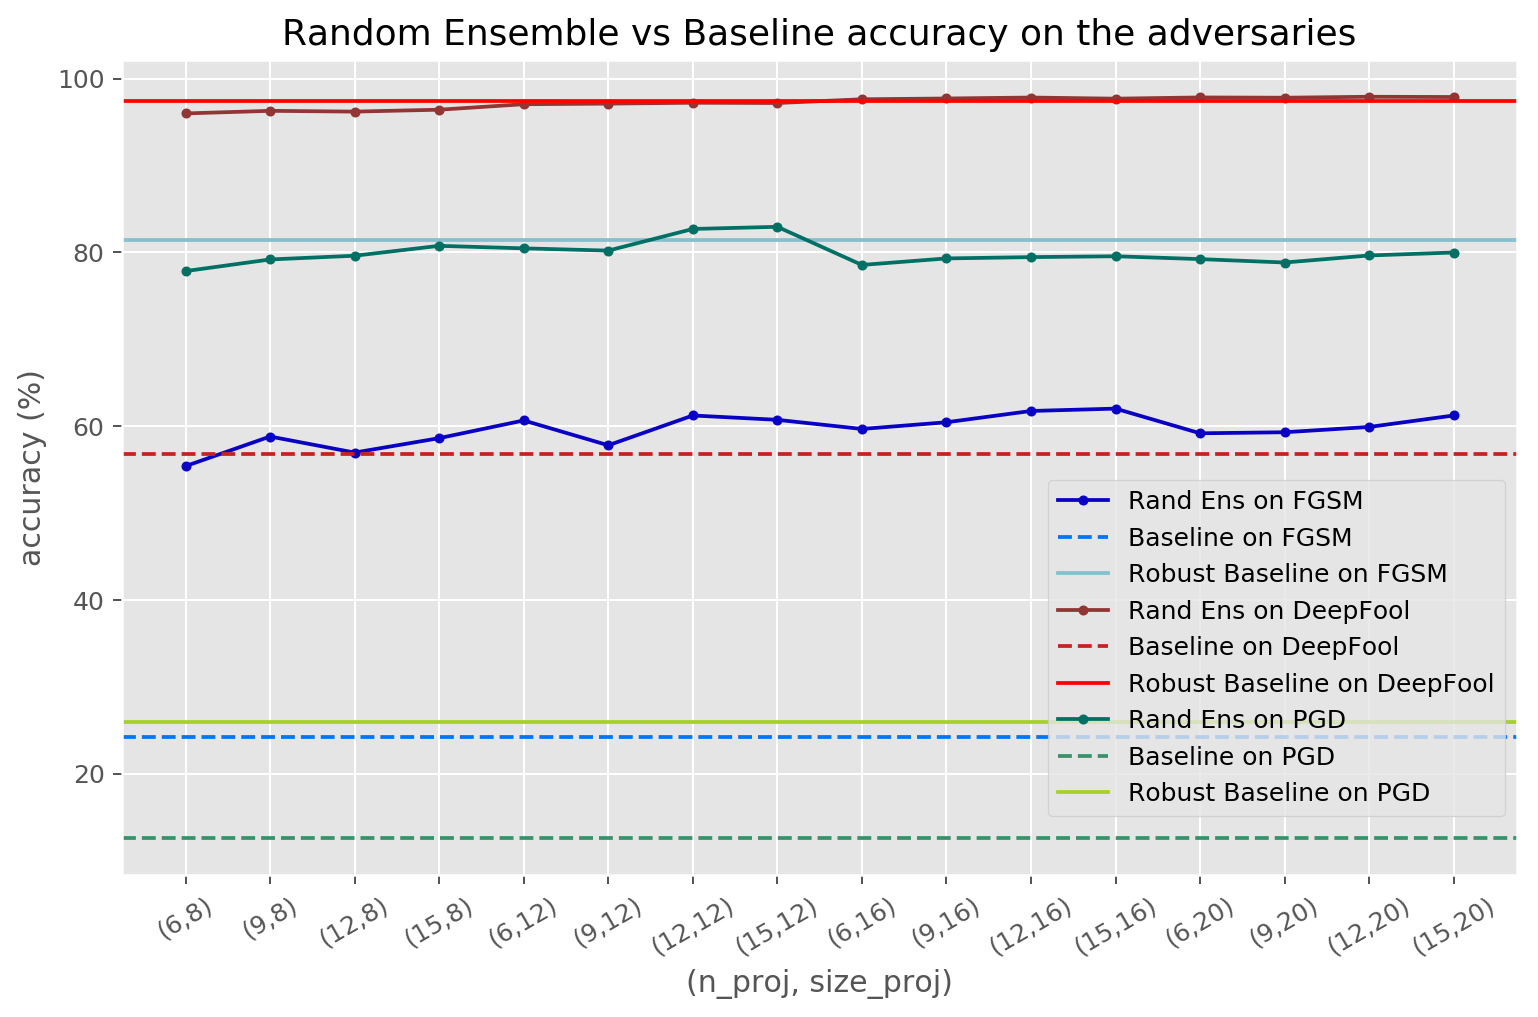

In [41]:
# random ensemble accuracy vs evaluation set

xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
baseline_robust_fgsm = 81.45
baseline_robust_deepf = 97.46
baseline_robust_pgd = 25.92
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

figure(num=None, figsize=(10, 6), dpi=180, facecolor='w', edgecolor='k')

plt.plot(x,random_fgsm,color="#0900c3",label='Rand Ens on FGSM', marker=".")
plt.axhline(y=baseline_fgsm, color="#0075f6", label='Baseline on FGSM', ls="dashed")
plt.axhline(y=baseline_robust_fgsm, color="#87c0cd", label='Robust Baseline on FGSM')

plt.plot(x,random_deepf,color="#913535",label='Rand Ens on DeepFool', marker=".")
plt.axhline(y=baseline_deepf, color="#c82121",label='Baseline on DeepFool',  ls="dashed")
plt.axhline(y=baseline_robust_deepf, color="#ff0000",label='Robust Baseline on DeepFool')

plt.plot(x,random_pgd,color="#007065",label='Rand Ens on PGD', marker=".")
plt.axhline(y=baseline_pgd, color="#389168",label='Baseline on PGD',  ls="dashed")
plt.axhline(y=baseline_robust_pgd, color="#a7d129",label='Robust Baseline on PGD')

plt.xlabel('(n_proj, size_proj)')
plt.ylabel('accuracy (%)')
plt.xticks(x, xlab, rotation=30) 
plt.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Random Ensemble vs Baseline accuracy on the adversaries")
plt.show()

NameError: name 'ax' is not defined

<Figure size 2160x1440 with 0 Axes>

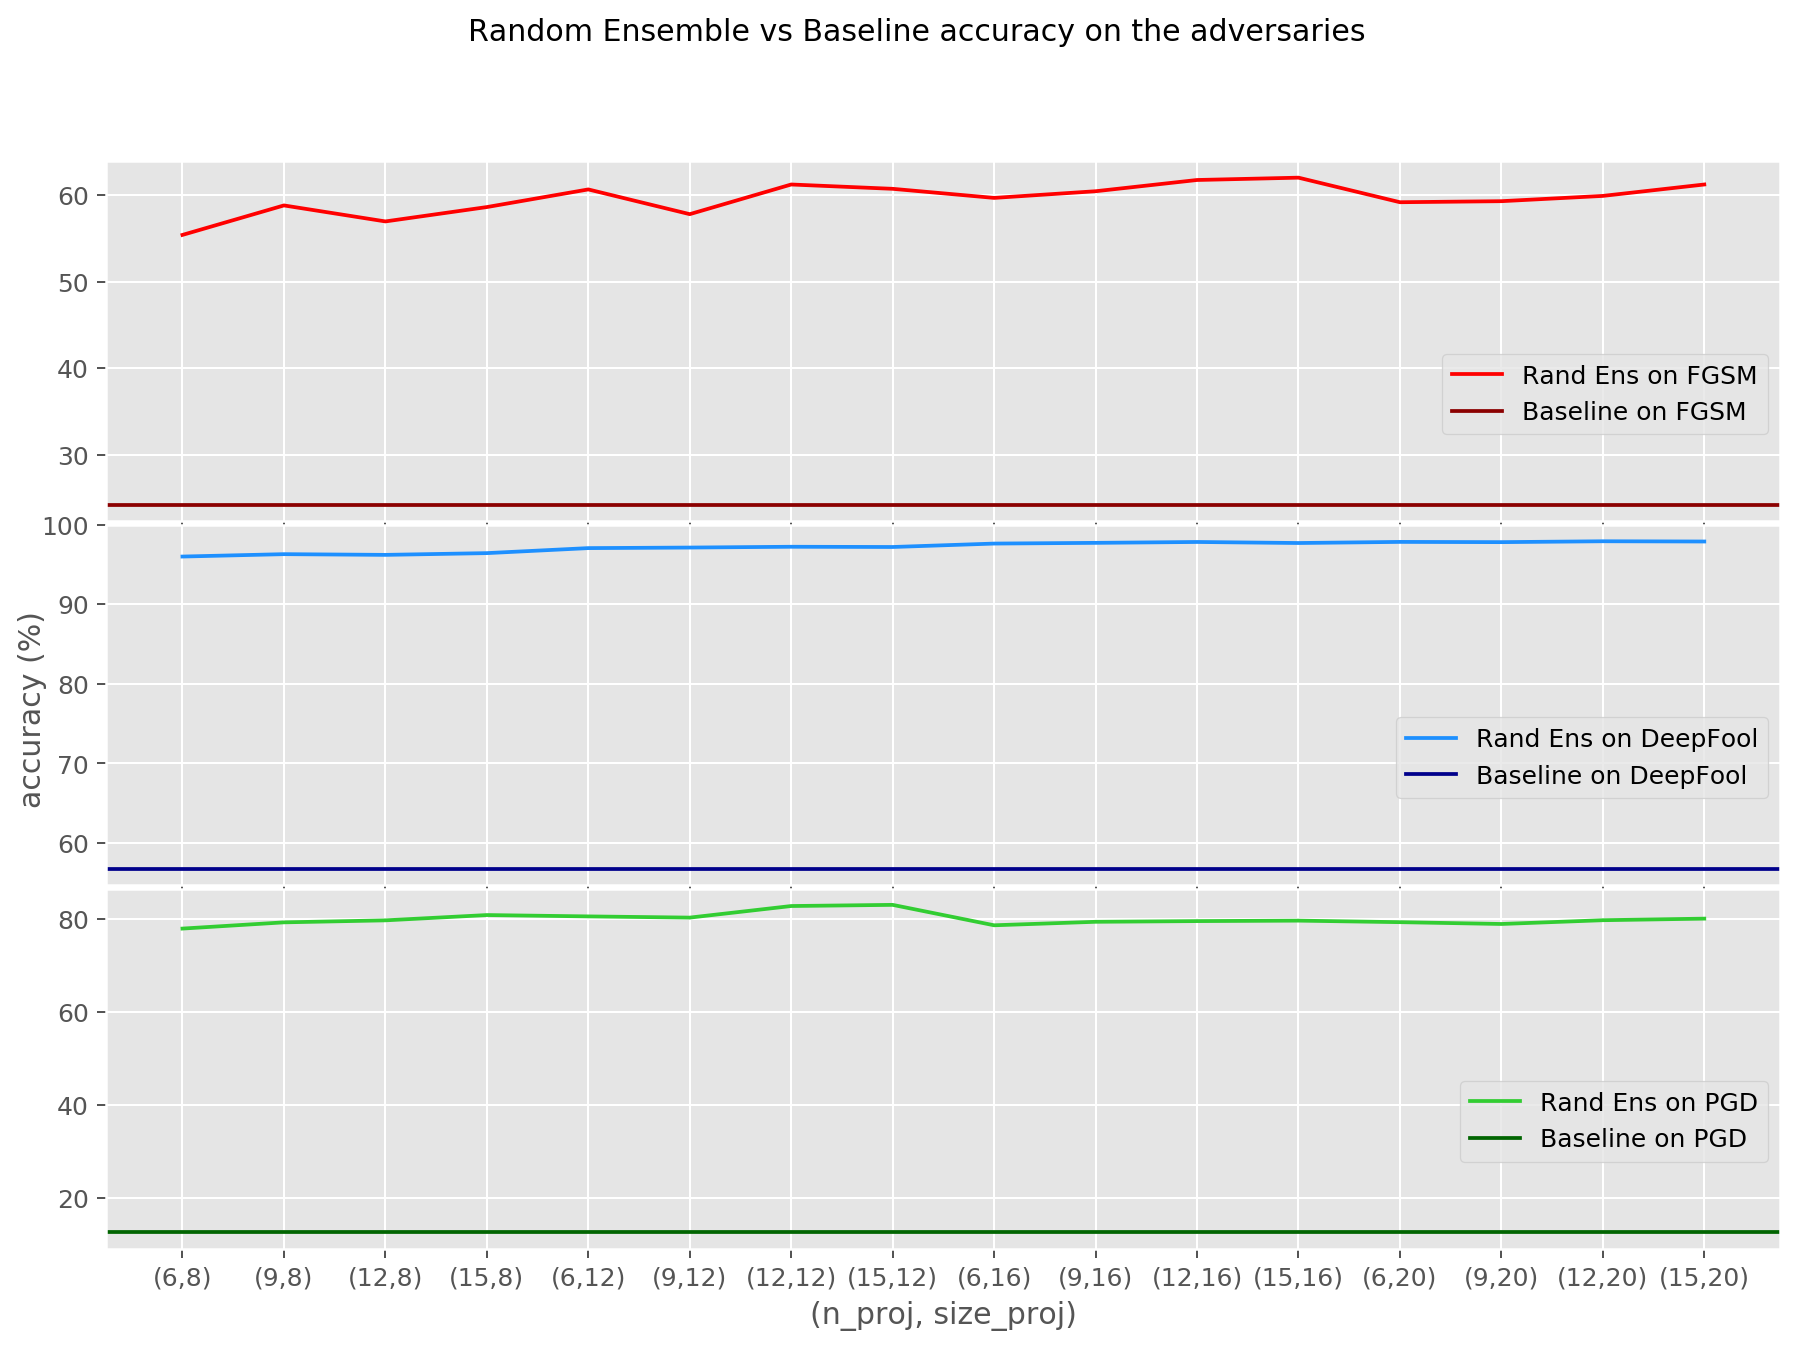

In [11]:
# random ensemble accuracy vs evaluation set

xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

figure(num=None, figsize=(12, 8), dpi=180, facecolor='w', edgecolor='k')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True,  figsize=(12, 8), dpi=180)
fig.suptitle("Random Ensemble vs Baseline accuracy on the adversaries")
plt.ylabel('accuracy (%)', position=(0.5,1.5))
plt.xlabel('(n_proj, size_proj)')
plt.xticks(x, xlab) 
fig.subplots_adjust(hspace=0.01)

#plt.subplot(311, sharex = ax)
ax1.plot(x,random_fgsm,color="r",label='Rand Ens on FGSM')
ax1.axhline(y=baseline_fgsm, color="darkred", label='Baseline on FGSM')
ax1.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))

#ax2.subplot(312)
ax2.plot(x,random_deepf,color="dodgerblue",label='Rand Ens on DeepFool')
ax2.axhline(y=baseline_deepf, color="darkblue",label='Baseline on DeepFool')
ax2.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))

#plt.subplot(313)
ax3.plot(x,random_pgd,color="limegreen",label='Rand Ens on PGD')
ax3.axhline(y=baseline_pgd, color="darkgreen",label='Baseline on PGD')
ax3.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))

ax.set_xticks(x, xlab) 
ax.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))

fig.show()

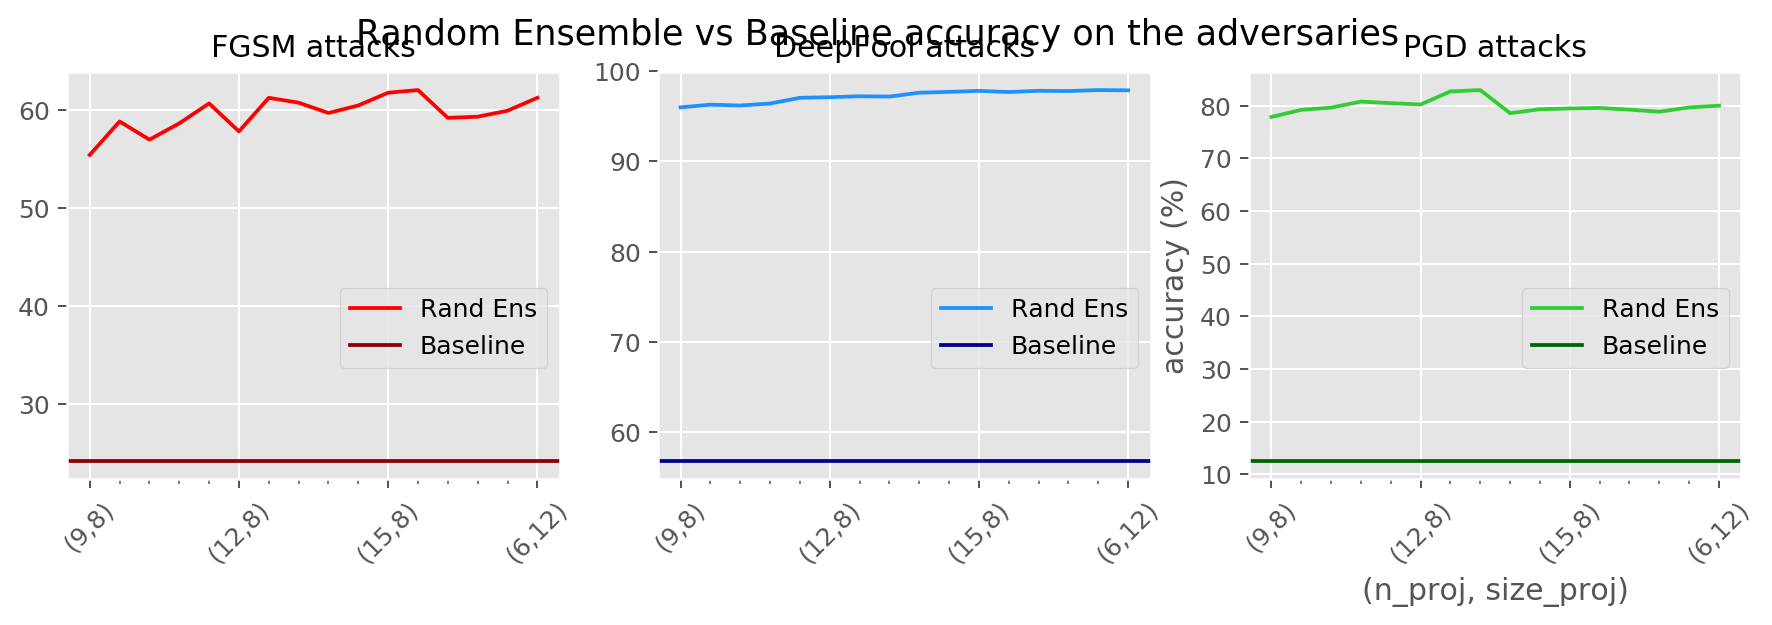

In [127]:
# data
baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
#random_fgsm_6 = [55.39,60.65,59.67,59.17]
#random_fgsm_9 = [58.80,57.79,60.44,59.29]
#random_fgsm_12 = [56.95,61.22,61.74,59.90]
#random_fgsm_15 = [58.61,60.72,62.01,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

# xticks
x = range(16)
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

# plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False,  figsize=(12, 3), dpi=180)
fig.suptitle("Random Ensemble vs Baseline accuracy on the adversaries", size=14)

ax1.set_title("FGSM attacks", size=12)
ax1.plot(x,random_fgsm,color="r",label='Rand Ens')
ax1.axhline(y=baseline_fgsm, color="darkred", label='Baseline')
ax1.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax1.set_xticks(x, xlab) 
ax1.set_xticklabels(xlab, rotation=45)

ax2.set_title("DeepFool attacks", size=12)
ax2.plot(x,random_deepf,color="dodgerblue",label='Rand Ens')
ax2.axhline(y=baseline_deepf, color="darkblue",label='Baseline')
ax2.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax2.set_xticks(x, xlab) 
ax2.set_xticklabels(xlab, rotation=45)

ax3.set_title("PGD attacks", size=12)
ax3.plot(x,random_pgd,color="limegreen",label='Rand Ens')
ax3.axhline(y=baseline_pgd, color="darkgreen",label='Baseline')
ax3.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax3.set_xticks(x, xlab) 
ax3.set_xticklabels(xlab, rotation=45)

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('(n_proj, size_proj)', position=(0.5,0))
fig.show()

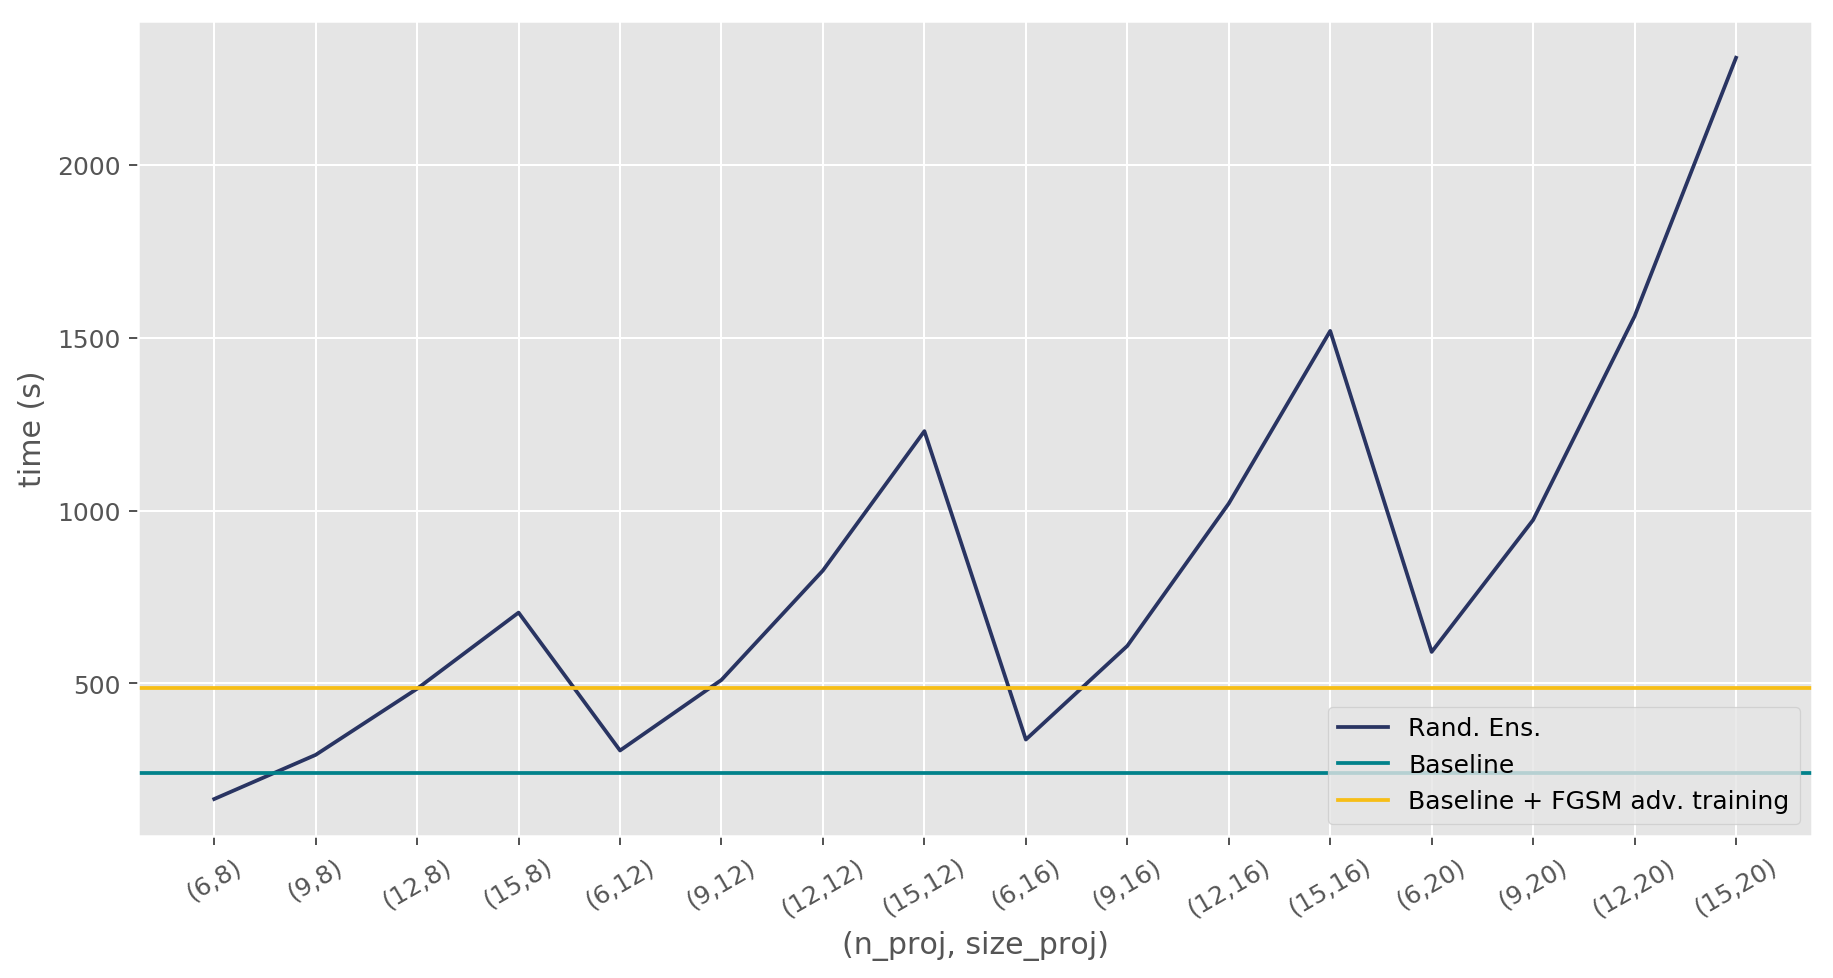

In [7]:
# random ensemble accuracy vs evaluation set

xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

x = range(16)

baseline_time = [241.90]
baseline_fgsm_advtraining_time = [486.45]
randens_times = [165.15,292.95,484.45,704.72,305.62,509.99,826.70,1229.96,\
                 337.230,608.353,1020.52,1520.01,591.027,972.899,1562.45,2310.75]

figure(num=None, figsize=(12, 6), dpi=180, facecolor='w', edgecolor='k')
plt.plot(x,randens_times,color='#293462',label='Rand. Ens.')
plt.axhline(y=baseline_time, color='#00818a', label='Baseline')
plt.axhline(y=baseline_fgsm_advtraining_time, color="#f7be16", label='Baseline + FGSM adv. training')

plt.xlabel('(n_proj, size_proj)')
plt.ylabel('time (s)')
plt.xticks(x, xlab, rotation=30) 
plt.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.title("Random Ensemble vs Baseline training time")
plt.show()